# All redistributions

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os, bz2, collections, lzma

import opencrimedata.san_francisco
import opencrimedata.chicago
import opencrimedata.dallas

# San Francisco

In [20]:
#datadir = os.path.join("/media", "disk", "Data")
datadir = os.path.join("..", "..", "..", "..", "Data")

def gen_sf_original():
    filename = os.path.join(datadir, "SF_Police_Department_Incidents.csv.bz2")
    with bz2.open(filename, "rt", encoding="UTF8") as f:
        yield from opencrimedata.san_francisco.load(f)
        
def gen_sf_1():
    filename = os.path.join(datadir, "SF_Redist_1.csv.bz2")
    with bz2.open(filename, "rt", encoding="UTF8") as f:
        yield from opencrimedata.san_francisco.load(f)
        
def gen_sf_2():
    filename = os.path.join(datadir, "SF_Redist_2.csv.bz2")
    with bz2.open(filename, "rt", encoding="UTF8") as f:
        yield from opencrimedata.san_francisco.load(f)
        
def gen_sf_3():
    filename = os.path.join(datadir, "SF_Redist_3.csv.bz2")
    with bz2.open(filename, "rt", encoding="UTF8") as f:
        yield from opencrimedata.san_francisco.load(f)

def gen_sf_3a():
    filename = os.path.join(datadir, "SF_Redist_3a.csv.bz2")
    with bz2.open(filename, "rt", encoding="UTF8") as f:
        yield from opencrimedata.san_francisco.load(f)
        
def gen_sf_4():
    filename = os.path.join(datadir, "SF_Redist_4.csv.bz2")
    with bz2.open(filename, "rt", encoding="UTF8") as f:
        yield from opencrimedata.san_francisco.load(f)

def gen_sf_4a():
    filename = os.path.join(datadir, "SF_Redist_4a.csv.bz2")
    with bz2.open(filename, "rt", encoding="UTF8") as f:
        yield from opencrimedata.san_francisco.load(f)

In [21]:
next(gen_sf_original())

Row(category='NON-CRIMINAL', description='LOST PROPERTY', datetime=datetime.datetime(2015, 1, 19, 14, 0), block='18TH ST / VALENCIA ST', point=(-122.42158168137, 37.7617007179518), idd='15006027571000', incident='150060275')

In [22]:
next(gen_sf_1())

Row(category='NON-CRIMINAL', description='LOST PROPERTY', datetime=datetime.datetime(2015, 1, 19, 14, 0), block='18TH ST / VALENCIA ST', point=(-122.42147427556684, 37.76146314127105), idd='15006027571000', incident='150060275')

In [23]:
next(gen_sf_2())

Row(category='NON-CRIMINAL', description='LOST PROPERTY', datetime=datetime.datetime(2015, 1, 19, 14, 0), block='18TH ST / VALENCIA ST', point=(-122.42155516185261, 37.761458259089395), idd='15006027571000', incident='150060275')

In [24]:
next(gen_sf_3())

Row(category='NON-CRIMINAL', description='LOST PROPERTY', datetime=datetime.datetime(2015, 1, 19, 14, 0), block='18TH ST / VALENCIA ST', point=(-122.42150458627911, 37.76093014121479), idd='15006027571000', incident='150060275')

In [27]:
next(gen_sf_3a())

Row(category='NON-CRIMINAL', description='LOST PROPERTY', datetime=datetime.datetime(2015, 1, 19, 14, 0), block='18TH ST / VALENCIA ST', point=(-122.42158032473093, 37.76172529925472), idd='15006027571000', incident='150060275')

In [28]:
next(gen_sf_4())

Row(category='NON-CRIMINAL', description='LOST PROPERTY', datetime=datetime.datetime(2015, 1, 19, 14, 0), block='18TH ST / VALENCIA ST', point=(-122.4209017, 37.76048959999974), idd='15006027571000', incident='150060275')

In [29]:
next(gen_sf_4a())

Row(category='NON-CRIMINAL', description='LOST PROPERTY', datetime=datetime.datetime(2015, 1, 19, 14, 0), block='18TH ST / VALENCIA ST', point=(-122.4218242, 37.76095719999975), idd='15006027571000', incident='150060275')

In [37]:
sources = [gen_sf_original, gen_sf_1, gen_sf_2, gen_sf_3, gen_sf_3a, gen_sf_4, gen_sf_4a]
names = ["original", "1", "2", "3", "3a", "4", "4a"]

all_sf_points = collections.defaultdict(dict)
for source, name in zip(sources, names):
    for row in source():
        all_sf_points[row.idd][name] = row.point

In [38]:
keys = [key for key in all_sf_points if len(all_sf_points[key])==7]
len(keys), len(all_sf_points)

(2115909, 2119901)

In [42]:
all_rows = [tuple(all_sf_points[key][name] for name in names) for key in keys]
all_rows = np.asarray(all_rows)
all_rows.shape

(2115909, 7, 2)

In [46]:
for i in range(all_rows.shape[1]):
    all_rows[:,i,0], all_rows[:,i,1] = proj(all_rows[:,i,0], all_rows[:,i,1])

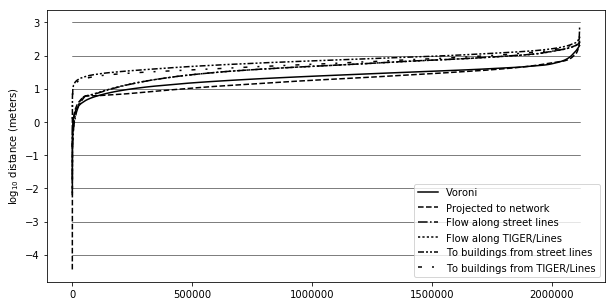

In [60]:
fig, ax = plt.subplots(figsize=(10,5))

for y in range(-4,4):
    ax.plot([0, all_rows.shape[0]], [y, y], linewidth=0.5, color="black")

names = ["", "Voroni", "Projected to network",
            "Flow along street lines", "Flow along TIGER/Lines",
            "To buildings from street lines", "To buildings from TIGER/Lines"]
linestyles = ["", "-", "--", "-.", ":", (0,(3,1,1,1,1,1)), (0,(2,5,1,5))]

for i, (name, ls) in enumerate(zip(names, linestyles)):
    if i == 0:
        continue
    dists = np.sqrt(np.sum((all_rows[:,0,:] - all_rows[:,i,:])**2, axis=-1))
    dists = np.sort(dists)
    ax.plot(np.log10(dists), label=name, color="black", linestyle=ls)
ax.legend(loc="lower right")
ax.set(ylabel="$\log_{10}$ distance (meters)")
None

# Chicago

In [2]:
#datadir = os.path.join("/media", "disk", "Data")
datadir = os.path.join("..", "..", "..", "..", "Data")

def gen_chicago_original():
    with lzma.open(os.path.join(datadir, "chicago_all.csv.xz"), "rt") as f:
        yield from opencrimedata.chicago.load_only_with_point(f)

def gen_chicago_1():
    with lzma.open(os.path.join(datadir, "chicago_redist_street_network.csv.xz"), "rt") as f:
        yield from opencrimedata.chicago.load_only_with_point(f)
        
def gen_chicago_2():
    with lzma.open(os.path.join(datadir, "chicago_redist_cluster.csv.xz"), "rt") as f:
        yield from opencrimedata.chicago.load_only_with_point(f)

def gen_chicago_3():
    with lzma.open(os.path.join(datadir, "chicago_redist_to_buildings.csv.xz"), "rt") as f:
        yield from opencrimedata.chicago.load_only_with_point(f)

def gen_chicago_4():
    with lzma.open(os.path.join(datadir, "Chicago_redist_network_flow.csv.xz"), "rt") as f:
        yield from opencrimedata.chicago.load_only_with_point(f)
        
def gen_chicago_5():
    with lzma.open(os.path.join(datadir, "chicago_redist_network_flow_to_buildings.csv.xz"), "rt") as f:
        yield from opencrimedata.chicago.load_only_with_point(f)
        
def gen_chicago_6():
    with lzma.open(os.path.join(datadir, "chicago_redist_network_flow_to_buildings_network.csv.xz"), "rt") as f:
        yield from opencrimedata.chicago.load_only_with_point(f)

In [3]:
next(gen_chicago_original())

Row(id='5189091', crime_type='OFFENSE INVOLVING CHILDREN', crime_subtype='CHILD ABUSE', location='RESIDENCE', address='108XX S AVENUE G', datetime=datetime.datetime(2006, 10, 12, 10, 58), point=(-87.531655723, 41.698387427))

In [4]:
next(gen_chicago_1())

Row(id='5189091', crime_type='OFFENSE INVOLVING CHILDREN', crime_subtype='CHILD ABUSE', location='RESIDENCE', address='108XX S AVENUE G', datetime=datetime.datetime(2006, 10, 12, 10, 58), point=(-87.53132445093954, 41.69779186169136))

In [5]:
next(gen_chicago_2())

Row(id='5189091', crime_type='OFFENSE INVOLVING CHILDREN', crime_subtype='CHILD ABUSE', location='RESIDENCE', address='108XX S AVENUE G', datetime=datetime.datetime(2006, 10, 12, 10, 58), point=(-87.53132670470409, 41.697879961880076))

In [6]:
next(gen_chicago_3())

Row(id='5189091', crime_type='OFFENSE INVOLVING CHILDREN', crime_subtype='CHILD ABUSE', location='RESIDENCE', address='108XX S AVENUE G', datetime=datetime.datetime(2006, 10, 12, 10, 58), point=(-87.53189599999996, 41.69779459999998))

In [7]:
next(gen_chicago_4())

Row(id='5189091', crime_type='OFFENSE INVOLVING CHILDREN', crime_subtype='CHILD ABUSE', location='RESIDENCE', address='108XX S AVENUE G', datetime=datetime.datetime(2006, 10, 12, 10, 58), point=(-87.53143112166953, 41.69726910890651))

In [8]:
next(gen_chicago_5())

Row(id='5189091', crime_type='OFFENSE INVOLVING CHILDREN', crime_subtype='CHILD ABUSE', location='RESIDENCE', address='108XX S AVENUE G', datetime=datetime.datetime(2006, 10, 12, 10, 58), point=(-87.53136569999997, 41.696266899999976))

In [9]:
next(gen_chicago_6())

Row(id='5189091', crime_type='OFFENSE INVOLVING CHILDREN', crime_subtype='CHILD ABUSE', location='RESIDENCE', address='108XX S AVENUE G', datetime=datetime.datetime(2006, 10, 12, 10, 58), point=(-87.53135129999995, 41.69713059999998))

In [10]:
sources = [gen_chicago_original, gen_chicago_1, gen_chicago_2, gen_chicago_3, gen_chicago_4,
           gen_chicago_5, gen_chicago_6]
names = ["original", "voroni from street", "voroni from clusters", "to buildings",
         "network flow", "flow to buildings", "flow to buildings from network"]

all_chicago_points = dict()
for i, (source, name) in enumerate(zip(sources, names)):
    for row in source():
        if row.id not in all_chicago_points:
            all_chicago_points[row.id] = np.zeros((len(sources),2))
        all_chicago_points[row.id][i] = row.point
    print("Done", name)

Done original
Done voroni from street
Done voroni from clusters
Done to buildings
Done network flow
Done flow to buildings
Done flow to buildings from network


In [11]:
keys = [key for key in all_chicago_points if sum(x!=0 for x in all_chicago_points[key][:,0])==7]
len(keys), len(all_chicago_points)

(5840468, 6323451)

In [12]:
all_rows = [all_chicago_points[key] for key in keys]
all_rows = np.asarray(all_rows)
all_rows.shape

(5840468, 7, 2)

In [13]:
proj = opencrimedata.chicago.projector()
for i in range(all_rows.shape[1]):
    all_rows[:,i,0], all_rows[:,i,1] = proj(all_rows[:,i,0], all_rows[:,i,1])

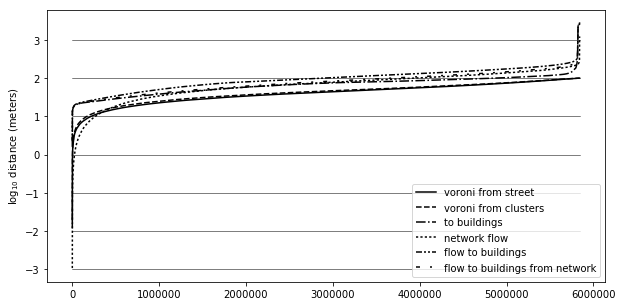

In [16]:
fig, ax = plt.subplots(figsize=(10,5))

for y in range(-3,4):
    ax.plot([0, all_rows.shape[0]], [y, y], linewidth=0.5, color="black")

linestyles = ["", "-", "--", "-.", ":", (0,(3,1,1,1,1,1)), (0,(2,5,1,5))]

for i, (name, ls) in enumerate(zip(names, linestyles)):
    if i == 0:
        continue
    dists = np.sqrt(np.sum((all_rows[:,0,:] - all_rows[:,i,:])**2, axis=-1))
    dists = np.sort(dists)
    ax.plot(np.log10(dists), label=name, color="black", linestyle=ls)
ax.legend(loc="lower right")
ax.set(ylabel="$\log_{10}$ distance (meters)")
None

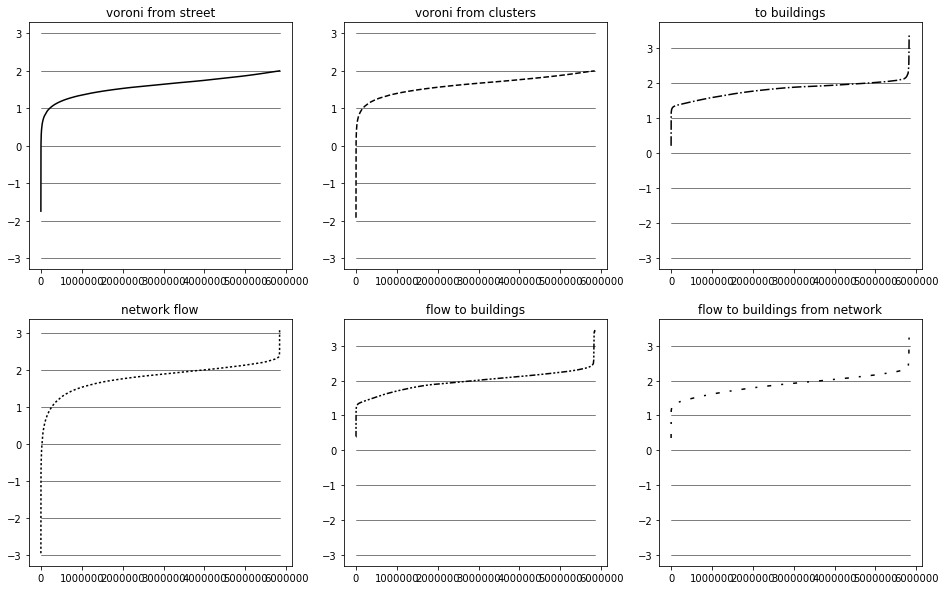

In [17]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16,10))

for ax in axes.flat:
    for y in range(-3,4):
        ax.plot([0, all_rows.shape[0]], [y, y], linewidth=0.5, color="black")

linestyles = ["", "-", "--", "-.", ":", (0,(3,1,1,1,1,1)), (0,(2,5,1,5))]

for i, (name, ls) in enumerate(zip(names, linestyles)):
    if i == 0:
        continue
    dists = np.sqrt(np.sum((all_rows[:,0,:] - all_rows[:,i,:])**2, axis=-1))
    dists = np.sort(dists)
    ax = axes.flatten()[i-1]
    ax.plot(np.log10(dists), label=name, color="black", linestyle=ls)
    ax.set_title(name)
None

# Dallas

Remember that we believe the "original" xy coordinates to be "wrong", so we expect large distances here.

In [6]:
#datadir = os.path.join("/media", "disk", "Data")
datadir = os.path.join("..", "..", "..", "..", "Data")

def gen_dallas_original():
    with lzma.open(os.path.join(datadir, "Dallas_7_Dec_2017.csv.xz"), "rt") as file:
        for row in opencrimedata.dallas.load_full(file):
            if row.xy is not None:
                yield row

def gen_dallas_1():
    with lzma.open(os.path.join(datadir, "Dallas_Redist_1.csv.xz"), "rt") as file:
        for row in opencrimedata.dallas.load_full(file):
            assert row.xy is not None
            yield row

def gen_dallas_2():
    with lzma.open(os.path.join(datadir, "Dallas_Redist_2.csv.xz"), "rt") as file:
        for row in opencrimedata.dallas.load_full(file):
            assert row.xy is not None
            yield row

In [7]:
next(gen_dallas_original())

Row(code='276285-2016', crime_type='BURGLARY', crime_subtype='BURGLARY-RESIDENCE', start_time=datetime.datetime(2016, 11, 16, 11, 0), end_time=datetime.datetime(2016, 11, 18, 11, 0), call_time=datetime.datetime(2016, 11, 18, 11, 42, 26), address='5850 BELT LINE RD', city='DALLAS 75254', lonlat=(-96.807131, 32.953948), xy=(758206.7262484236, 2144003.9338816064))

In [8]:
next(gen_dallas_1())

Row(code='276285-2016', crime_type='BURGLARY', crime_subtype='BURGLARY-RESIDENCE', start_time=datetime.datetime(2016, 11, 16, 11, 0), end_time=datetime.datetime(2016, 11, 18, 11, 0), call_time=datetime.datetime(2016, 11, 18, 11, 42, 26), address='5850 BELT LINE RD', city='DALLAS 75254', lonlat=None, xy=(758190.6762580645, 2144023.8988102614))

In [9]:
next(gen_dallas_2())

Row(code='276285-2016', crime_type='BURGLARY', crime_subtype='BURGLARY-RESIDENCE', start_time=datetime.datetime(2016, 11, 16, 11, 0), end_time=datetime.datetime(2016, 11, 18, 11, 0), call_time=datetime.datetime(2016, 11, 18, 11, 42, 26), address='5850 BELT LINE RD', city='DALLAS 75254', lonlat=None, xy=(758108.9156951993, 2143910.795561087))

In [12]:
sources = [gen_dallas_original, gen_dallas_1, gen_dallas_2]
names = ["original xy", "to streets", "to buildings"]

all_dallas_points = dict()
for i, (source, name) in enumerate(zip(sources, names)):
    for row in source():
        if row.code not in all_dallas_points:
            all_dallas_points[row.code] = np.zeros((len(sources),2))
        all_dallas_points[row.code][i] = row.xy
    print("Done", name)

Done original xy
Done to streets
Done to buildings


In [15]:
keys = [key for key in all_dallas_points if sum(x!=0 for x in all_dallas_points[key][:,0])==3]
len(keys), len(all_dallas_points)

(293349, 293401)

In [24]:
all_rows = [all_dallas_points[key] for key in keys]
all_rows = np.asarray(all_rows)

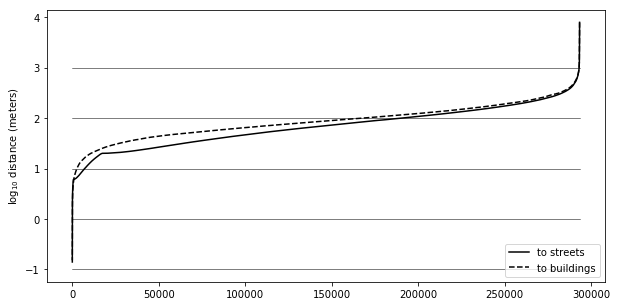

In [26]:
fig, ax = plt.subplots(figsize=(10,5))

for y in range(-1,4):
    ax.plot([0, all_rows.shape[0]], [y, y], linewidth=0.5, color="black")

linestyles = ["", "-", "--", "-.", ":", (0,(3,1,1,1,1,1)), (0,(2,5,1,5))]

for i, (name, ls) in enumerate(zip(names, linestyles)):
    if i == 0:
        continue
    dists = np.sqrt(np.sum((all_rows[:,0,:] - all_rows[:,i,:])**2, axis=-1))
    dists = np.sort(dists)
    ax.plot(np.log10(dists), label=name, color="black", linestyle=ls)
ax.legend(loc="lower right")
ax.set(ylabel="$\log_{10}$ distance (meters)")
None